In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [6]:
print(X_train.shape)

(60000, 28, 28)


In [7]:
print(X_test.shape)

(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to number of labels"
assert(X_train.shape[1:] == (28,28)), "The number of pixels in image is not 28x28"
assert(X_test.shape[1:] == (28,28)), "The number of pixels in image is not 28x28"

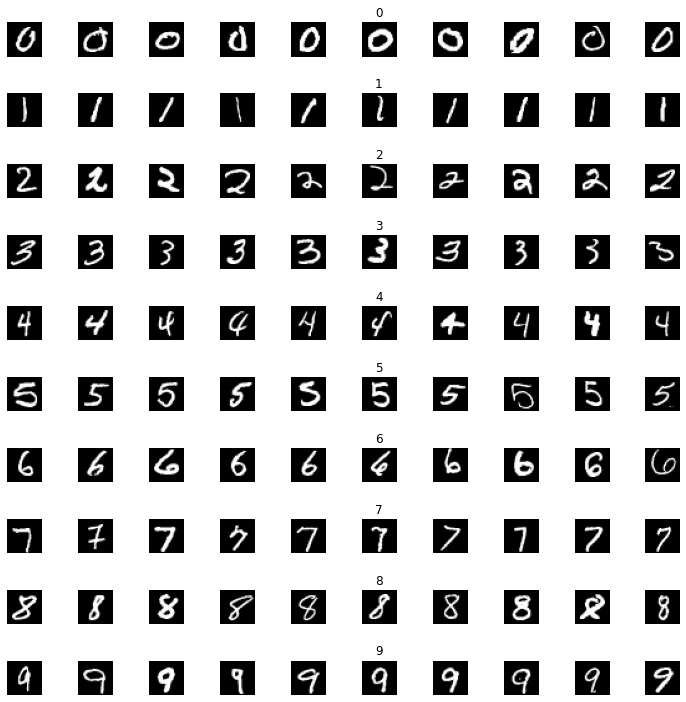

In [9]:
num_of_samples = []
cols = 10
num_classes = 10

fig,ax = plt.subplots(num_classes,cols, figsize =(10,10) )
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    ax[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:], cmap=plt.get_cmap("gray"))
    ax[j][i].axis('off')
    if i == 5:
      ax[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

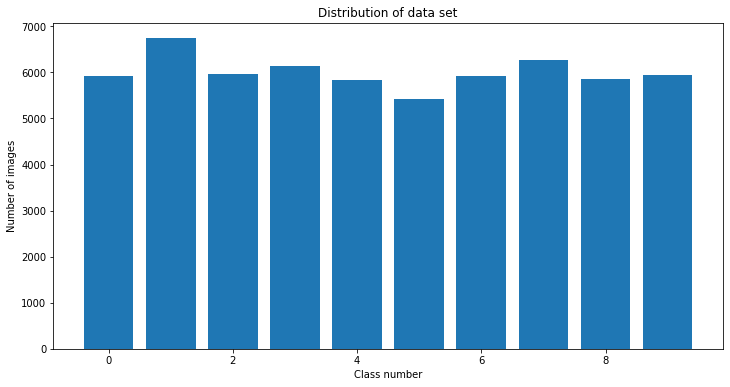

In [10]:
print(num_of_samples)
plt.figure(figsize=(12,6))
plt.bar(range(0,10),num_of_samples)
plt.title("Distribution of data set")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
X_train[0,10,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [14]:
num_of_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_of_pixels)
X_train.shape

(60000, 784)

In [0]:
X_test = X_test.reshape(X_test.shape[0],num_of_pixels)

In [0]:
def create_model():
  model = Sequential()
  model.add(Dense(10,input_dim=num_of_pixels,activation='relu'))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [17]:
model = create_model()
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


In [18]:
h = model.fit(X_train,y_train, validation_split=0.1, epochs=15, batch_size=200, verbose=1, shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/15





54000/54000 [==============================] - 1s 19us/step - loss: 0.4246 - acc: 0.8693 - val_loss: 0.2300 - val_acc: 0.9328
Epoch 2/15
54000/54000 [==============================] - 1s 15us/step - loss: 0.2553 - acc: 0.9252 - val_loss: 0.1875 - val_acc: 0.9455
Epoch 3/15
54000/54000 [==============================] - 1s 15us/step - loss: 0.2280 - acc: 0.9318 - val_loss: 0.1656 - val_acc: 0.9518
Epoch 4/15
54000/54000 [==============================] - 1s 15us/step - loss: 0.2031 - acc: 0.9388 - val_loss: 0.1785 - val_acc: 0.9493
Epoch 5/15
54000/54000 [==============================] - 1s 15us/step - loss: 0.1901 - acc: 0.9426 - val_loss: 0.1608 - val_acc: 0.9520
Epoch 6/15
54000/54000 [==============================] - 1s 15us/step - loss: 0.1817 - acc: 0.9446 - val_loss: 0.1728 - val_acc: 0.9513
Epoch 7/15
54000/54000 [===

Text(0.5, 0, 'epochs')

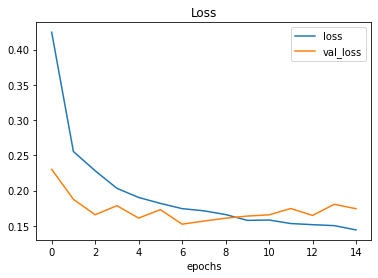

In [19]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

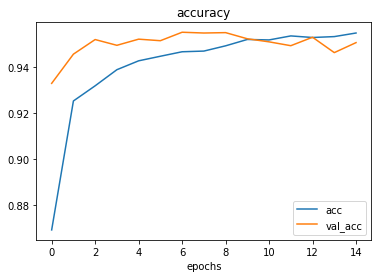

In [20]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epochs')

In [21]:
score = model.evaluate(X_test,y_test, verbose=0)
print("test score",score[0])
print("test accuracy",score[1])

test score 0.2112235692024231
test accuracy 0.9423


<Response [200]>


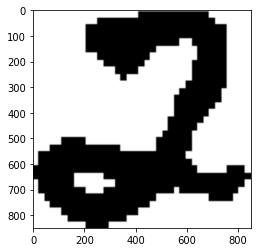

In [22]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream='True')
print(response)
img = Image.open(response.raw)
plt.imshow(img)

In [23]:
img_array = np.asarray(img)
img_array.shape

(850, 850, 4)

In [24]:
import cv2
resized = cv2.resize(img_array,(28,28))
resized.shape

(28, 28, 4)

In [25]:
grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
grayscale.shape

(28, 28)

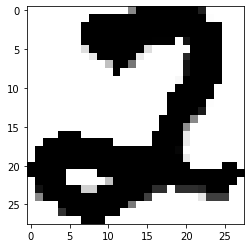

In [26]:
plt.imshow(grayscale, cmap=plt.get_cmap("gray"))

In [27]:
print(grayscale)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 137   0   0   0   0
    0   0   0   0  33 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 253 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   1   1
    1 255  19   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 222   0   0   0   0   0   0   0 222 255 255
  255 255 255   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 234   0   0   0   0   0 234 255 255 255
  255 255  40   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 192   0   0 118 255 255 255 255
  255 255  20   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 25

In [28]:
final_image = cv2.bitwise_not(grayscale)
print(final_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

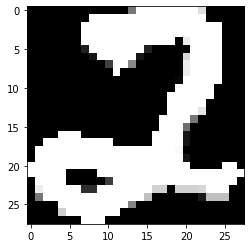

In [29]:
plt.imshow(final_image,cmap=plt.get_cmap("gray"))

In [0]:
final_norm_image = final_image/255

In [31]:
image1 = final_norm_image.reshape(1,784)
image1.shape

(1, 784)

In [0]:
prediction = model.predict_classes(image1)

In [33]:
print(prediction)

[5]
